# Important Notes
(1) When using VASP, PAOFLOW requires spglib. All examples show below are run with ISYM = 2 in VASP. ISYM = -1 also works. ISYM = 0 (TR only) may work but have not been tested. Make sure the PAOFLOW printed space group is correct.   
(2) Either run VASP SCF with LWAVE=T and a fine K-mesh, or run VASP SCF (LCHARG=T) first with a coarse K-mesh, then non-SCF (ICHARG=11 and LWAVE=T) with finer K-mesh.  
    If magnetic, MAGMOM in INCAR is necessary. This is because PAOFLOW reads the MAGMOM tag in vasprun.xml to determine the symmetry, which comes from INCAR.  
(3) PAOFLOW reads "vasprun.xml" and "WAVECAR", make sure they are in the directory.   
(4) If using VASP, when calling pao_hamiltonian(), DO NOT set "open_wedge=False" even if symmetry is turned off (ISYM = -1). This is because VASP uses a different set of k-mesh and a mapping between the k-points is required.

In [1]:
# Change PAOFLOW export directory if necessary
from PAOFLOW import PAOFLOW
import numpy as np
import matplotlib.pyplot as plt

# Example01: Si

In [2]:
paoflow = PAOFLOW(savedir='examples_vasp/Si/nscf_nspin1',  
                  outputdir='examples_vasp/Si/output_nspin1', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Fd-3m (227)
Insulator: True
Magnetic: False
Number of kpoints: 72
Number of e

In [3]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Si':['3S','3P','3D','4S','4P','4F']}
paoflow.projections(internal=True)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Si  AEWFC: ./BASIS/Si\3S.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\3P.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\3D.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\4S.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\4P.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\4F.dat               tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4F  l=3, m=1
      atwfc:  15  4F  l=3, m=2
      atwfc:  16  4F  l=3, m=3
      atwfc:  17  4F  l=3, m=4
      atwfc:  18  4F  l=3, m=5
      atwfc:  19  4F  l=3, m=6
      atwfc:  20  4F 

In [4]:
paoflow.projectability()

Projectability vector  [0.99545429 0.99236617 0.99054065 0.98887027 0.9886738  0.98537975
 0.98320259 0.98132912 0.98231753 0.98544492 0.97823829 0.97547007
 0.96801959 0.96032555 0.95707135 0.93447649 0.92020483 0.89566517]
# of bands with good projectability > 0.95 = 15
Range of suggested shift  15.90873178  ,  22.52683178
Projectability in:                          0.019 sec


In [5]:
attr['nkpnts']

72

In [6]:
paoflow.pao_hamiltonian()

Building Hks in:                            1.037 sec
k -> R in:                                  0.199 sec


In [7]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   0.499 sec


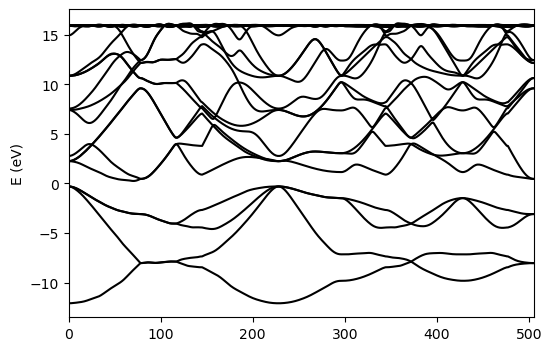

In [8]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0],color='black')
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Si_VASP.png',bbox_inches='tight')  

# Example02: Pt (with SOC)

In [9]:
outdir = 'examples_vasp/Pt/output/'
paoflow = PAOFLOW(savedir='examples_vasp/Pt/nscf',
                  outputdir=outdir, 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Fm-3m (225)
Insulator: False
Magnetic: False
Number of kpoints: 72
Number of 

In [10]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Pt':['5D','6S','6P','7S','7P']}
paoflow.projections(internal=True)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Pt  AEWFC: ./BASIS/Pt\5D.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\6S.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\6P.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\7S.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\7P.dat               tau: [0. 0. 0.]
      atwfc:   1  5D  l=2, m=1
      atwfc:   2  5D  l=2, m=2
      atwfc:   3  5D  l=2, m=3
      atwfc:   4  5D  l=2, m=4
      atwfc:   5  5D  l=2, m=5
      atwfc:   6  5D  l=2, m=1
      atwfc:   7  5D  l=2, m=2
      atwfc:   8  5D  l=2, m=3
      atwfc:   9  5D  l=2, m=4
      atwfc:  10  5D  l=2, m=5
      atwfc:  11  6S  l=0, m=1
      atwfc:  12  6S  l=0, m=1
      atwfc:  13  6P  l=1, m=1
      atwfc:  14  6P  l=1, m=2
      atwfc:  15  6P  l=1, m=3
      atwfc:  16  6P  l=1, m=1
      atwfc:  17  6P  l=1, m=2
      atwfc:  18  6P  l=1, m=3
      atwfc:  19  7S  l=0, m=1
      atwfc:  20  7S  l=0, m=1
      atwfc:  21  7P  l=1, m=1
      atwfc:  22  7P  l=

In [11]:
paoflow.projectability()

Projectability vector  [0.98378247 0.98377555 0.9664084  0.96639923 0.96572662 0.96572693
 0.95536536 0.95536281 0.95205075 0.95204394 0.95756134 0.95755714
 0.84209774 0.84207072 0.63588513 0.63584591 0.73980118 0.73991766
 0.48708985 0.48524363]
# of bands with good projectability > 0.95 = 12
Range of suggested shift  5.49489934  ,  16.76739934
Projectability in:                          0.021 sec


In [12]:
paoflow.pao_hamiltonian(expand_wedge=True)

Building Hks in:                            0.893 sec
k -> R in:                                  0.151 sec


In [13]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   0.473 sec


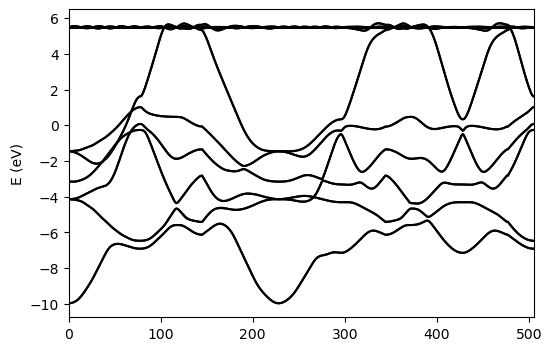

In [14]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()

In [15]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing(smearing='m-p')

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 1.79 GBytes
R -> k with Zero Padding in:                1.099 sec
Eigenvalues in:                             6.953 sec
Gradient in:                                3.441 sec
Momenta in:                                14.683 sec
Adaptive Smearing in:                       1.041 sec


In [16]:
paoflow.spin_Hall(emin=-8., emax=4., s_tensor=[[0,1,2]])

Writing bxsf files for Spin Berry Curvature
Spin Hall Conductivity in:                 15.131 sec


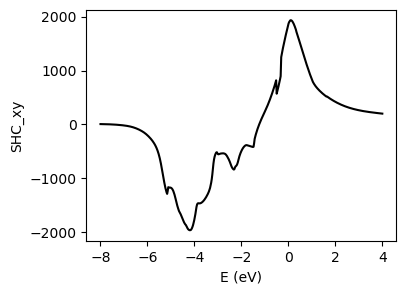

In [17]:
shc = np.loadtxt('examples_vasp/Pt/output/'+'shcEf_z_xy.dat')
fig = plt.figure(figsize=(4,3))
plt.plot(shc[:,0],shc[:,1],color='black')
plt.xlabel("E (eV)")
plt.ylabel("SHC_xy")
plt.show()

# Example03: Fe (with SOC, FM)

In [18]:
outdir = 'examples_vasp/Fe/output/'
paoflow = PAOFLOW(savedir='examples_vasp/Fe/nscf/',
                  outputdir=outdir, 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Im-3m (229)
Insulator: False
Magnetic: True
Number of kpoints: 242
Number of 

In [19]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Fe':['3P','3D','4S','4P','4D']}
paoflow.projections(internal=True)

atom: Fe  AEWFC: ./BASIS/Fe\3P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\3D.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4S.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3P  l=1, m=1
      atwfc:   5  3P  l=1, m=2
      atwfc:   6  3P  l=1, m=3
      atwfc:   7  3D  l=2, m=1
      atwfc:   8  3D  l=2, m=2
      atwfc:   9  3D  l=2, m=3
      atwfc:  10  3D  l=2, m=4
      atwfc:  11  3D  l=2, m=5
      atwfc:  12  3D  l=2, m=1
      atwfc:  13  3D  l=2, m=2
      atwfc:  14  3D  l=2, m=3
      atwfc:  15  3D  l=2, m=4
      atwfc:  16  3D  l=2, m=5
      atwfc:  17  4S  l=0, m=1
      atwfc:  18  4S  l=0, m=1
      atwfc:  19  4P  l=1, m=1
      atwfc:  20  4P  l=1, m=2
      atwfc:  21  4P  l=1, m=3
      atwfc:  22  4P  l=

In [20]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.91934065 0.92555982 0.90231424 0.9075009  0.89660788 0.89410842
 0.89673707 0.89954969 0.86947615 0.89642947 0.91378943 0.88213418
 0.90643802 0.89018919 0.88639971 0.87168193 0.84598311 0.83298231
 0.67210555 0.66286774]
# of bands with good projectability > 0.85 = 16
Range of suggested shift  10.854187460000002  ,  25.160487460000002
Projectability in:                          0.043 sec


In [21]:
paoflow.pao_hamiltonian(expand_wedge=True)

Building Hks in:                            0.839 sec
k -> R in:                                  0.197 sec


In [22]:
paoflow.bands(ibrav=3,nk=500)

Bands in:                                   0.534 sec


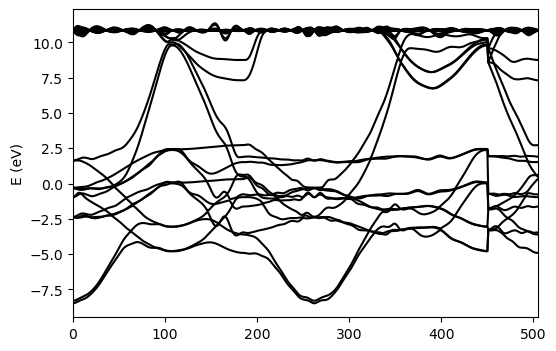

In [23]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0],color='black',label="k = 12*12*12")
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Fe_VASP.png',bbox_inches='tight')

In [24]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing(smearing='m-p')

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 3.07 GBytes
R -> k with Zero Padding in:                1.487 sec
Eigenvalues in:                             6.127 sec
Gradient in:                                5.922 sec
Momenta in:                                10.128 sec
Adaptive Smearing in:                       1.805 sec


In [25]:
paoflow.anomalous_Hall(do_ac=True, emin=-6., emax=4., a_tensor=np.array([[0,1]]))

Writing bxsf files for Berry Curvature
Anomalous Hall Conductivity in:           428.779 sec


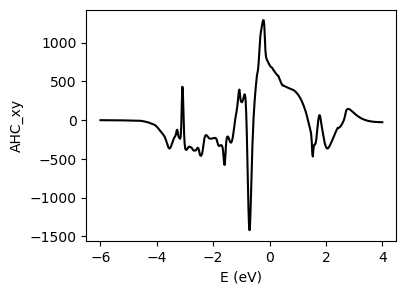

In [26]:
ahc = np.loadtxt(outdir+'ahcEf_xy.dat')
fig = plt.figure(figsize=(4,3))
plt.xlabel("E (eV)")
plt.ylabel("AHC_xy")
plt.plot(ahc[:,0],ahc[:,1],color='black')
plt.show()

# Example04: MnF2 (nspin=2, collinear AFM)

In [27]:
paoflow = PAOFLOW(savedir='examples_vasp/MnF2/nscf',
                  outputdir='examples_vasp/MnF2/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 8 8 12 0 0 0
Space group: P4_2/mnm (136)
Insulator: True
Magnetic: True
Number of kpoints: 105
Number of 

In [28]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Mn':['3P','3D','4S','4P','4D'],
                        'F':['3S','3P','3D','4F']}
paoflow.projections(internal=True) 

atom: Mn  AEWFC: ./BASIS/Mn\3P.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\3D.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\4S.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\4P.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3D  l=2, m=1
      atwfc:   5  3D  l=2, m=2
      atwfc:   6  3D  l=2, m=3
      atwfc:   7  3D  l=2, m=4
      atwfc:   8  3D  l=2, m=5
      atwfc:   9  4S  l=0, m=1
      atwfc:  10  4P  l=1, m=1
      atwfc:  11  4P  l=1, m=2
      atwfc:  12  4P  l=1, m=3
      atwfc:  13  4D  l=2, m=1
      atwfc:  14  4D  l=2, m=2
      atwfc:  15  4D  l=2, m=3
      atwfc:  16  4D  l=2, m=4
      atwfc:  17  4D  l=2, m=5
atom: Mn  AEWFC: ./BASIS/Mn\3P.dat               tau: [4.68219993 4.68219993 3.15297726]
atom: Mn  AEWFC: ./BASIS/Mn\3D.dat               tau: [4.68

In [29]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.93565425 0.96063729 0.96194732 0.96183498 0.95638907 0.95649008
 0.95223096 0.94884742 0.94764465 0.95037196 0.95061394 0.95184821
 0.94580618 0.9468576  0.95190371 0.95089621 0.87241991 0.88435548
 0.88325011 0.87381938 0.88414889 0.90920219 0.90951314 0.90728063
 0.90894793 0.89731937 0.92610859 0.95864061 0.96878697 0.9701202
 0.96754537 0.96983697 0.97145769 0.97067052 0.97000004 0.9667312 ]
# of bands with good projectability > 0.85 = 36
Projectability in:                          0.072 sec


In [30]:
paoflow.pao_hamiltonian()

Building Hks in:                            3.556 sec
k -> R in:                                  1.262 sec


In [31]:
paoflow.bands(ibrav=6,nk=500)

Bands in:                                   5.850 sec


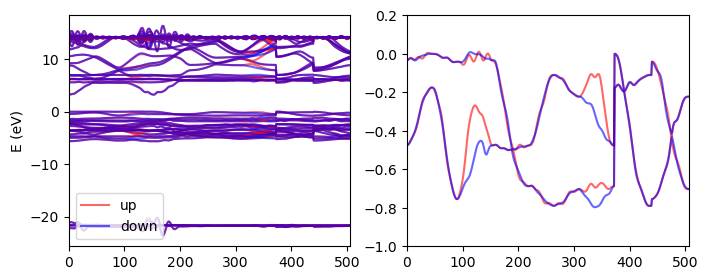

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
# plot the paoflow bands (all bands and bands near Fermi energy)
eband = arry['E_k']
ax[0].plot(eband[:,0,0],color='red',alpha=0.6,label="up")
ax[0].plot(eband[:,0,1],color='blue',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    ax[0].plot(eband[:,ib,0],color='red',alpha=0.6)
    ax[0].plot(eband[:,ib,1],color='blue',alpha=0.6)
    ax[1].plot(eband[:,ib,0],color='red',alpha=0.6)
    ax[1].plot(eband[:,ib,1],color='blue',alpha=0.6)
ax[1].set_ylim([-1,0.2])
ax[0].set_xlim([0,eband.shape[0]-1])
ax[1].set_xlim([0,eband.shape[0]-1])
ax[0].set_ylabel("E (eV)")
ax[0].legend()
plt.show()
# plt.savefig('MnF2_VASP.png',bbox_inches='tight')

# Example05: Mn3Ir (with SOC, noncollinear 120$^\circ$ AFM)

In [33]:
paoflow = PAOFLOW(savedir='examples_vasp/Mn3Ir/nscf',
                  outputdir='examples_vasp/Mn3Ir/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 10 0 0 0
Space group: R-3m (166)
Insulator: False
Magnetic: True
Number of kpoints: 172
Number of e

In [34]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Ir':['5P','5D','6S','6P','7S'],
                        'Mn':['3P','3D','4S','4P','4D']}
paoflow.projections(internal=True) 

atom: Ir  AEWFC: ./BASIS/Ir\5P.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\5D.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\6S.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\6P.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\7S.dat               tau: [0. 0. 0.]
      atwfc:   1  5P  l=1, m=1
      atwfc:   2  5P  l=1, m=2
      atwfc:   3  5P  l=1, m=3
      atwfc:   4  5P  l=1, m=1
      atwfc:   5  5P  l=1, m=2
      atwfc:   6  5P  l=1, m=3
      atwfc:   7  5D  l=2, m=1
      atwfc:   8  5D  l=2, m=2
      atwfc:   9  5D  l=2, m=3
      atwfc:  10  5D  l=2, m=4
      atwfc:  11  5D  l=2, m=5
      atwfc:  12  5D  l=2, m=1
      atwfc:  13  5D  l=2, m=2
      atwfc:  14  5D  l=2, m=3
      atwfc:  15  5D  l=2, m=4
      atwfc:  16  5D  l=2, m=5
      atwfc:  17  6S  l=0, m=1
      atwfc:  18  6S  l=0, m=1
      atwfc:  19  6P  l=1, m=1
      atwfc:  20  6P  l=1, m=2
      atwfc:  21  6P  l=1, m=3
      atwfc:  22  6P  l=

In [35]:
paoflow.projectability(pthr=0.9)

Projectability vector  [0.98950007 0.98980826 0.96899053 0.97226495 0.96652035 0.97024332
 0.96396809 0.96949889 0.96529339 0.96553962 0.9607225  0.95821783
 0.95836573 0.95501922 0.94935386 0.94731173 0.94549257 0.9449566
 0.94315058 0.93637946 0.9372998  0.92908459 0.92963646 0.93410546
 0.93440566 0.9367316  0.93623391 0.94260169 0.9432917  0.94364601
 0.93433038 0.9321479  0.92082841 0.90892625 0.90875406 0.91333852
 0.91428356 0.91232389 0.90884599 0.90314062]
# of bands with good projectability > 0.9 = 40
Projectability in:                          0.065 sec


In [36]:
paoflow.pao_hamiltonian()

Building Hks in:                            3.362 sec
k -> R in:                                  1.397 sec


In [37]:
paoflow.bands(ibrav=5,nk=500)

Bands in:                                   5.183 sec


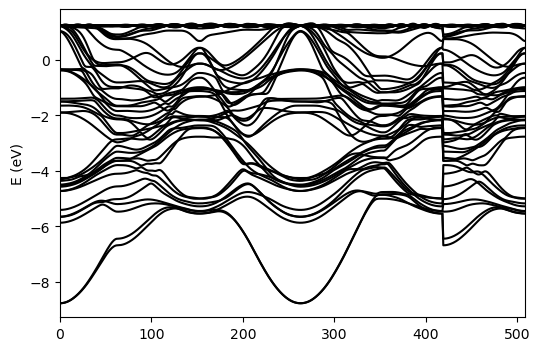

In [38]:
fig = plt.figure(figsize=(6,4))
# plot the paoflow bands
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Mn3Ir_VASP.png',bbox_inches='tight')

# Example06: FeRh (with SOC, FM)

In [39]:
paoflow = PAOFLOW(savedir='examples_vasp/FeRh/nscf_soc/',
                  outputdir='examples_vasp/FeRh/output_soc/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Pm-3m (221)
Insulator: False
Magnetic: True
Number of kpoints: 266
Number of 

In [40]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Fe':['3P','3D','4S','4P','4D'],
                        'Rh':['4P','4D','5S','5P']}
paoflow.projections(internal=True)

atom: Fe  AEWFC: ./BASIS/Fe\3P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\3D.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4S.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3P  l=1, m=1
      atwfc:   5  3P  l=1, m=2
      atwfc:   6  3P  l=1, m=3
      atwfc:   7  3D  l=2, m=1
      atwfc:   8  3D  l=2, m=2
      atwfc:   9  3D  l=2, m=3
      atwfc:  10  3D  l=2, m=4
      atwfc:  11  3D  l=2, m=5
      atwfc:  12  3D  l=2, m=1
      atwfc:  13  3D  l=2, m=2
      atwfc:  14  3D  l=2, m=3
      atwfc:  15  3D  l=2, m=4
      atwfc:  16  3D  l=2, m=5
      atwfc:  17  4S  l=0, m=1
      atwfc:  18  4S  l=0, m=1
      atwfc:  19  4P  l=1, m=1
      atwfc:  20  4P  l=1, m=2
      atwfc:  21  4P  l=1, m=3
      atwfc:  22  4P  l=

In [41]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.95284625 0.93608429 0.93488867 0.93024693 0.92257399 0.92695889
 0.91930803 0.91731565 0.91622885 0.8891827  0.89007717 0.88954686
 0.88901386 0.90041189 0.90189831 0.88875131 0.8735859  0.84675562
 0.84828332 0.88242738 0.89022038 0.89295449 0.93624605 0.92530571
 0.93235934 0.93126708 0.92238382 0.92332625 0.82418775 0.79762542
 0.78350355 0.72867141]
# of bands with good projectability > 0.85 = 26
Range of suggested shift  7.904900900000001  ,  15.317900900000001
Projectability in:                          0.082 sec


In [42]:
paoflow.pao_hamiltonian()

Building Hks in:                            1.526 sec
k -> R in:                                  0.552 sec


In [43]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                   1.381 sec


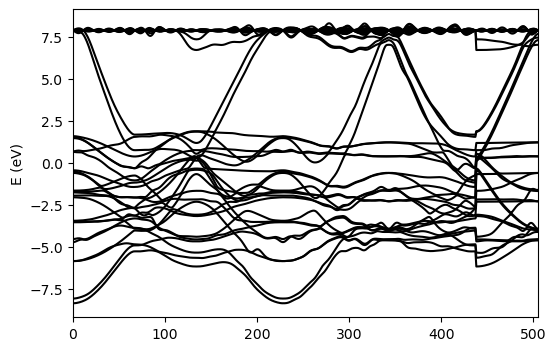

In [44]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('FeRh_VASP.png',bbox_inches='tight')  

 # Example06: FeRh (nspin = 2, FM)

In [45]:
paoflow = PAOFLOW(savedir='examples_VASP/FeRh/nscf_nspin2/',
                  outputdir='examples_VASP/FeRh/output_nspin2/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Space group: Pm-3m (221)
Insulator: False
Magnetic: True
Number of kpoints: 84
Number of e

In [46]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Fe':['3P','3D','4S','4P','4D'],
                        'Rh':['4P','4D','5S','5P']}
paoflow.projections(internal=True)

atom: Fe  AEWFC: ./BASIS/Fe\3P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\3D.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4S.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3D  l=2, m=1
      atwfc:   5  3D  l=2, m=2
      atwfc:   6  3D  l=2, m=3
      atwfc:   7  3D  l=2, m=4
      atwfc:   8  3D  l=2, m=5
      atwfc:   9  4S  l=0, m=1
      atwfc:  10  4P  l=1, m=1
      atwfc:  11  4P  l=1, m=2
      atwfc:  12  4P  l=1, m=3
      atwfc:  13  4D  l=2, m=1
      atwfc:  14  4D  l=2, m=2
      atwfc:  15  4D  l=2, m=3
      atwfc:  16  4D  l=2, m=4
      atwfc:  17  4D  l=2, m=5
atom: Rh  AEWFC: ./BASIS/Rh\4P.dat               tau: [2.83458898 2.83458898 2.83458898]
atom: Rh  AEWFC: ./BASIS/Rh\4D.dat               tau: [2.83

In [47]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.95931309 0.92417702 0.93739591 0.91328684 0.9133172  0.91216958
 0.8500292  0.86133234 0.87639185 0.88506244 0.89217158 0.93935137
 0.92312376 0.92576617 0.79661917 0.76096841]
# of bands with good projectability > 0.85 = 14
Range of suggested shift  9.22688743  ,  17.200987429999998
Projectability in:                          0.042 sec


In [48]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.374 sec
k -> R in:                                  0.305 sec


In [49]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                   0.875 sec


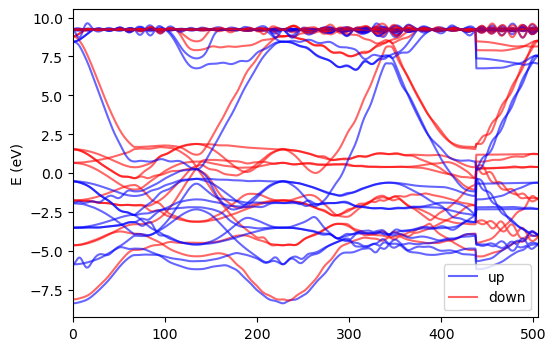

In [50]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0,0],color='blue',alpha=0.6,label="up")
plt.plot(eband[:,0,1],color='red',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib,0],color='blue',alpha=0.6)
    plt.plot(eband[:,ib,1],color='red',alpha=0.6)
plt.legend()
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('FeRh_VASP_nspin2.png',bbox_inches='tight')  

# Example 07: CrI3 monolayer (nspin = 2, FM)

In [51]:
paoflow = PAOFLOW(savedir='examples_vasp/CrI3_monolayer/nscf_nspin2/',  
                  outputdir='examples_vasp/CrI3_monolayer/output_nspin2/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 1 0 0 0
Space group: P-31m (162)
Insulator: True
Magnetic: True
Number of kpoints: 14
Number of ele

In [52]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Cr':['3D','4S','4P','4D'],
                        'I':['5S','5P','5D','4F']}
paoflow.projections(internal=True) 

atom: Cr  AEWFC: ./BASIS/Cr\3D.dat               tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ./BASIS/Cr\4S.dat               tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ./BASIS/Cr\4P.dat               tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ./BASIS/Cr\4D.dat               tau: [ 6.62154732  3.82295205 17.06756766]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  4S  l=0, m=1
      atwfc:   7  4P  l=1, m=1
      atwfc:   8  4P  l=1, m=2
      atwfc:   9  4P  l=1, m=3
      atwfc:  10  4D  l=2, m=1
      atwfc:  11  4D  l=2, m=2
      atwfc:  12  4D  l=2, m=3
      atwfc:  13  4D  l=2, m=4
      atwfc:  14  4D  l=2, m=5
atom: Cr  AEWFC: ./BASIS/Cr\3D.dat               tau: [-5.99163830e-08  7.64590422e+00  1.70675657e+01]
atom: Cr  AEWFC: ./BASIS/Cr\4S.dat               tau: [-5.99163830e-08  7.64590422e+00  1.7067

In [53]:
paoflow.projectability(pthr=0.75)

Projectability vector  [0.77321842 0.77831942 0.80059532 0.8135573  0.88415333 0.88576532
 0.91440377 0.89766529 0.89753928 0.90052737 0.89608802 0.89219529
 0.89074466 0.87851586 0.87560942 0.86483114 0.84983586 0.84735495
 0.84190592 0.84700679 0.84602969 0.853372   0.84627802 0.8348677
 0.85044101 0.85611948 0.83800016 0.83603811 0.81417158 0.8177344
 0.77539777 0.78587375 0.77763403 0.77437208 0.76342077 0.7890436
 0.61985583 0.73563308 0.72320177 0.77296199]
# of bands with good projectability > 0.75 = 37
Range of suggested shift  5.61245194  ,  6.12405194
Projectability in:                          0.045 sec


In [54]:
paoflow.pao_hamiltonian()

Building Hks in:                            1.145 sec
k -> R in:                                  0.405 sec


In [55]:
AUTOA = 0.529177249
high_sym_points = np.array([[0,0,0],[0.5,0,0],[1/3,1/3,0],[0,0,0]])
B = arry['b_vectors']
npoints = high_sym_points.shape[0]
nkq = []; k_dist = 0
for i in range(high_sym_points.shape[0]-1):
    d = np.linalg.norm((high_sym_points[i+1,:] - high_sym_points[i,:])@B)
    nkq.append(int(d*2000))
kqs = np.zeros((np.sum(np.array(nkq)),3))
k_plot = []
nkq.insert(0,0)
index = np.cumsum(nkq)
k_dist = 0
k_label = [0]
for i in range(high_sym_points.shape[0]-1):
    temp = np.tile(high_sym_points[i,:],[nkq[i+1],1]) + np.outer(np.linspace(0,1,nkq[i+1]),(high_sym_points[i+1,:] - high_sym_points[i,:]))
    kqs[index[i]:index[i+1],:] = temp
    kd = np.linalg.norm((temp-high_sym_points[i,:])@B,axis=1)*2*np.pi/AUTOA
    k_plot.extend(kd+k_dist)
    k_dist += kd[-1]
    k_label.append(k_dist)
arry['kq'] = kqs.T

In [56]:
paoflow.bands()

Bands in:                                   3.751 sec


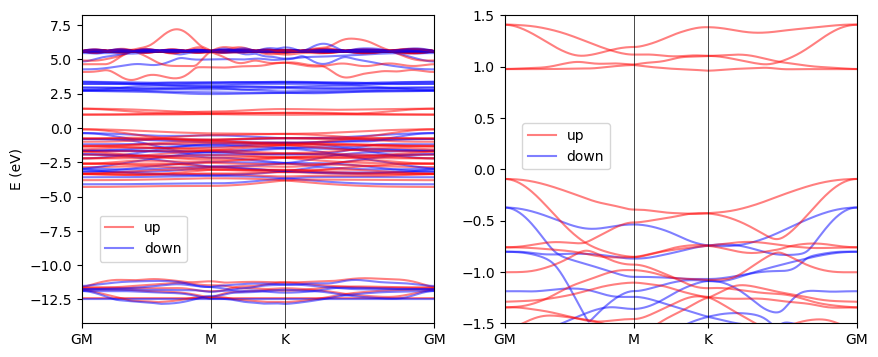

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
eband = arry['E_k']
ax[0].plot(eband[:,0,0],color='red',alpha=0.5,label="up")
ax[0].plot(eband[:,0,1],color='blue',alpha=0.5,label="down")
ax[1].plot(k_plot,eband[:,0,0],color='red',alpha=0.5,label="up")
ax[1].plot(k_plot,eband[:,0,1],color='blue',alpha=0.5,label="down")
for ib in range(1,eband.shape[1]):
    ax[0].plot(k_plot,eband[:,ib,0],color='red',alpha=0.5)
    ax[0].plot(k_plot,eband[:,ib,1],color='blue',alpha=0.5)
    ax[1].plot(k_plot,eband[:,ib,0],color='red',alpha=0.5)
    ax[1].plot(k_plot,eband[:,ib,1],color='blue',alpha=0.5)
    
ax[0].legend(loc=[0.05,0.2])
ax[1].legend(loc=[0.05,0.5])
ax[0].set_xlim([0,k_dist])
ax[1].set_xlim([0,k_dist])
ax[1].set_ylim([-1.5,1.5])
ax[0].set_ylabel("E (eV)")
ax[0].set_xticks(ticks=k_label,labels=["GM","M","K","GM"])
ax[1].set_xticks(ticks=k_label,labels=["GM","M","K","GM"])
for _,x in enumerate(k_label):
    ax[0].axvline(x,color='k',linewidth=0.5)
    ax[1].axvline(x,color='k',linewidth=0.5)
plt.show()

# Example 07: CrI3 monolayer (with SOC, FM)

In [58]:
paoflow_soc = PAOFLOW(savedir='examples_vasp/CrI3_monolayer/nscf_soc/',  
                  outputdir='examples_vasp/CrI3_monolayer/output_soc/', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow_soc.data_controller
arry_soc,attr_soc = paoflow_soc.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 1 0 0 0
Space group: P-31m (162)
Insulator: True
Magnetic: True
Number of kpoints: 18
Number of ele

In [59]:
attr_soc['basispath'] = './BASIS/'
arry_soc['configuration'] = {'Cr':['3D','4S','4P'],
                        'I':['5S','5P','5D']}
paoflow_soc.projections(internal=True) 

atom: Cr  AEWFC: ./BASIS/Cr\3D.dat               tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ./BASIS/Cr\4S.dat               tau: [ 6.62154732  3.82295205 17.06756766]
atom: Cr  AEWFC: ./BASIS/Cr\4P.dat               tau: [ 6.62154732  3.82295205 17.06756766]
      atwfc:   1  3D  l=2, m=1
      atwfc:   2  3D  l=2, m=2
      atwfc:   3  3D  l=2, m=3
      atwfc:   4  3D  l=2, m=4
      atwfc:   5  3D  l=2, m=5
      atwfc:   6  3D  l=2, m=1
      atwfc:   7  3D  l=2, m=2
      atwfc:   8  3D  l=2, m=3
      atwfc:   9  3D  l=2, m=4
      atwfc:  10  3D  l=2, m=5
      atwfc:  11  4S  l=0, m=1
      atwfc:  12  4S  l=0, m=1
      atwfc:  13  4P  l=1, m=1
      atwfc:  14  4P  l=1, m=2
      atwfc:  15  4P  l=1, m=3
      atwfc:  16  4P  l=1, m=1
      atwfc:  17  4P  l=1, m=2
      atwfc:  18  4P  l=1, m=3
atom: Cr  AEWFC: ./BASIS/Cr\3D.dat               tau: [-5.99163830e-08  7.64590422e+00  1.70675657e+01]
atom: Cr  AEWFC: ./BASIS/Cr\4S.dat               tau: [-5.9916

In [60]:
paoflow_soc.projectability(pthr=0.7)

Projectability vector  [0.73611407 0.74628588 0.73028234 0.73131722 0.72135815 0.72161519
 0.71419177 0.70739464 0.71274802 0.68535179 0.70038213 0.68173546
 0.90094178 0.89755733 0.87531905 0.87733887 0.87341614 0.8798092
 0.87997815 0.87141259 0.87109554 0.8681956  0.86812705 0.86733944
 0.86471945 0.86523357 0.84632759 0.85270915 0.85254414 0.83060548
 0.82559916 0.82718159 0.82435855 0.81891814 0.83310147 0.84148716
 0.83655322 0.83820689 0.83656722 0.83651565 0.83772713 0.84002935
 0.83841622 0.83987037 0.8397022  0.84146899 0.8415096  0.83948337
 0.83830407 0.84244886 0.84197817 0.83713524 0.84074275 0.83186246
 0.748711   0.7538188  0.75884226 0.76818401 0.81897843 0.81934684
 0.7871616  0.77691292 0.7558641  0.75819953 0.733228   0.75411515
 0.74173695 0.73638002 0.80519167 0.70839191 0.64840075 0.74166572
 0.58963885 0.5729444  0.5939028  0.72565129 0.7023494  0.66074309
 0.73665575 0.69752726]
# of bands with good projectability > 0.7 = 72
Range of suggested shift  4.95842024

In [61]:
paoflow_soc.pao_hamiltonian()

Building Hks in:                            0.734 sec
k -> R in:                                  0.279 sec


In [62]:
AUTOA = 0.529177249
high_sym_points = np.array([[0,0,0],[0.5,0,0],[1/3,1/3,0],[0,0,0]])
B = arry['b_vectors']
npoints = high_sym_points.shape[0]
nkq = []; k_dist = 0
for i in range(high_sym_points.shape[0]-1):
    d = np.linalg.norm((high_sym_points[i+1,:] - high_sym_points[i,:])@B)
    nkq.append(int(d*2000))
kqs = np.zeros((np.sum(np.array(nkq)),3))
k_plot = []
nkq.insert(0,0)
index = np.cumsum(nkq)
k_dist = 0
k_label = [0]
for i in range(high_sym_points.shape[0]-1):
    temp = np.tile(high_sym_points[i,:],[nkq[i+1],1]) + np.outer(np.linspace(0,1,nkq[i+1]),(high_sym_points[i+1,:] - high_sym_points[i,:]))
    kqs[index[i]:index[i+1],:] = temp
    kd = np.linalg.norm((temp-high_sym_points[i,:])@B,axis=1)*2*np.pi/AUTOA
    k_plot.extend(kd+k_dist)
    k_dist += kd[-1]
    k_label.append(k_dist)
arry_soc['kq'] = kqs.T

In [63]:
paoflow_soc.bands()

Bands in:                                   2.144 sec


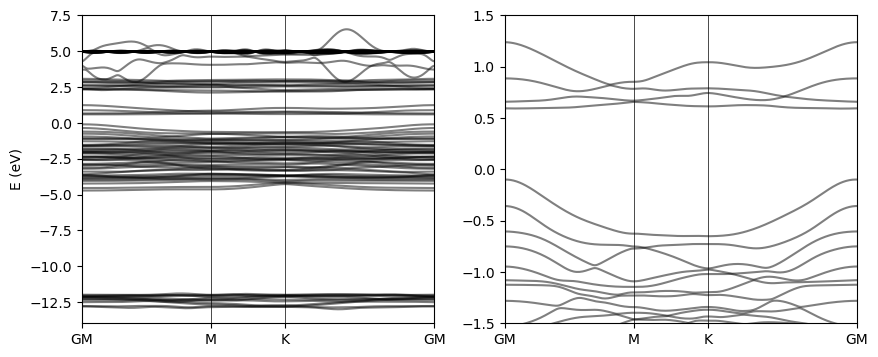

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
eband = arry_soc['E_k']
for ib in range(eband.shape[1]):
    ax[0].plot(k_plot,eband[:,ib],color='k',alpha=0.5)
    ax[1].plot(k_plot,eband[:,ib],color='k',alpha=0.5)
ax[0].set_xlim([0,k_dist])
ax[1].set_xlim([0,k_dist])
ax[1].set_ylim([-1.5,1.5])
ax[0].set_ylabel("E (eV)")
ax[0].set_xticks(ticks=k_label,labels=["GM","M","K","GM"])
ax[1].set_xticks(ticks=k_label,labels=["GM","M","K","GM"])
for _,x in enumerate(k_label):
    ax[0].axvline(x,color='k',linewidth=0.5)
    ax[1].axvline(x,color='k',linewidth=0.5)
plt.show()